# Decision tree Classifier with Prepruning and Post Pruning - Utkarsh Gaikwad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
dataset = load_iris()

In [4]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Label encoding the species
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df['species'].unique()

array([0, 1, 2])

# Seperate Dependent and Independet variable

In [8]:
X = df.drop(labels=['species'],axis=1)
Y = df[['species']]

# Train test Split

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.33,random_state=42)

## Creating Decesion Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

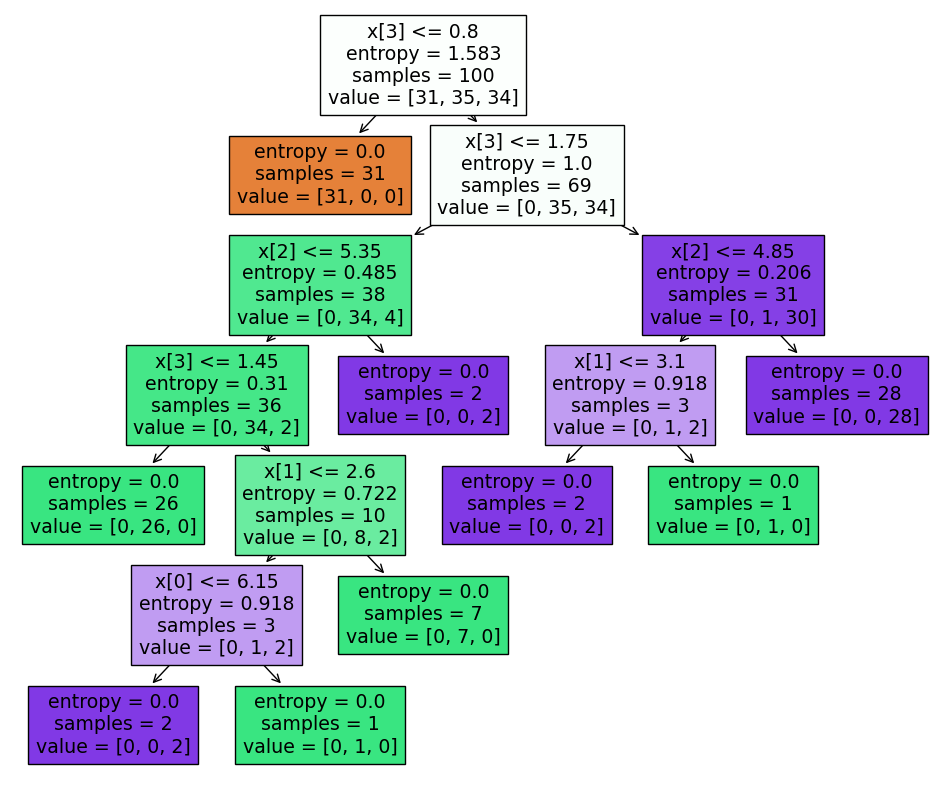

In [11]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(dtc,filled=True)
plt.show()

# Post Pruning Max depth

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=2)
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

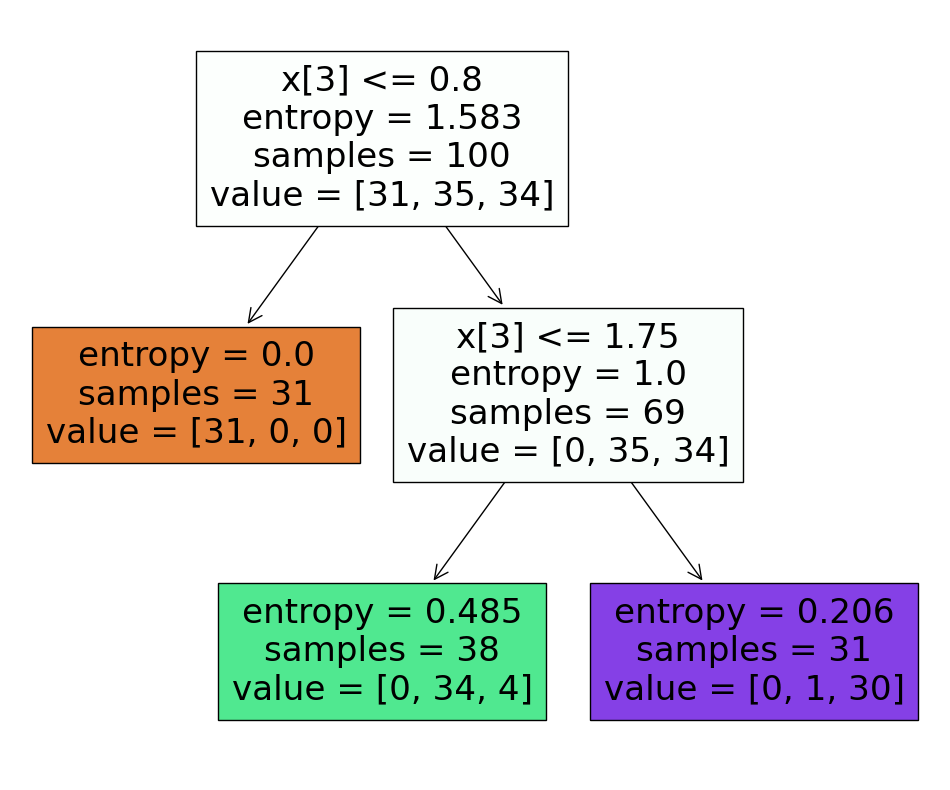

In [13]:
plt.figure(figsize=(12,10))
tree.plot_tree(dtc,filled=True)
plt.show()

# Making Predictions on Test data and evaluating

In [14]:
ytest_pred = dtc.predict(xtest)

In [15]:
ytest_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

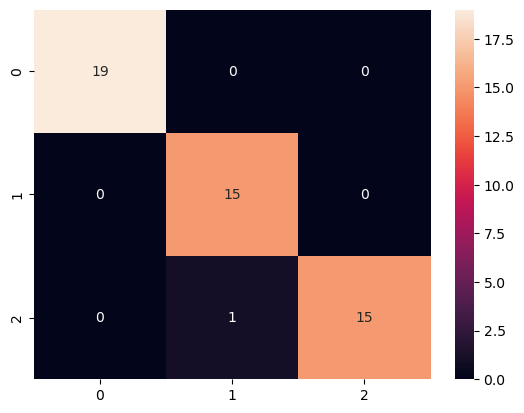

In [16]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest, ytest_pred)
sns.heatmap(cf,annot=True)
plt.show()

In [17]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



---

# Prepruning in Decision Tree

In [18]:
parameters = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['sqrt','log2']
}

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
dtc = DecisionTreeClassifier()

In [21]:
gscv = GridSearchCV(dtc, param_grid=parameters,cv=5,scoring='accuracy')

In [22]:
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [23]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'random'}

In [37]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=4, max_features='log2', splitter='random')

In [38]:
ypred_test = best_dtc.predict(xtest)

In [39]:
ypred_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

<AxesSubplot: >

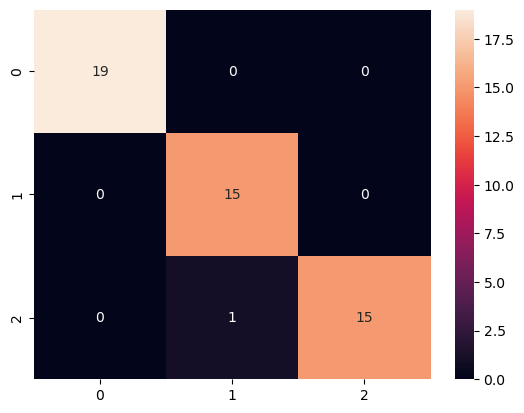

In [40]:
cf = confusion_matrix(ytest, ytest_pred)
sns.heatmap(cf,annot=True)

In [41]:
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ytest_pred)

0.98

# Pickling the final model

In [43]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(obj=best_dtc,file=file)

## Verifying and prediction with pickle file

In [44]:
with open('model.pkl','rb') as file:
    clf = pickle.load(file)

In [45]:
clf

DecisionTreeClassifier(max_depth=4, max_features='log2', splitter='random')

In [46]:
clf.predict(xtest)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2])